# アヤメの二値分類
## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica
sepal_lengthとpetal_length

《実際の問題では？》

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
from sklearn.datasets import load_iris 
iris = load_iris()
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)
y = y.rename(columns={0 : 'Species'})
df = X.join(y)

In [2]:
df = df.query('Species == [1, 2]')
df = df.drop('sepal width (cm)', axis=1).drop('petal width (cm)', axis=1)

In [3]:
#df[['sepal length (cm)', 'petal length (cm)','Species']].head()

## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

《実際の問題では？》

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

In [4]:
#print(df.shape)

In [5]:
#df.columns.values[0:2]

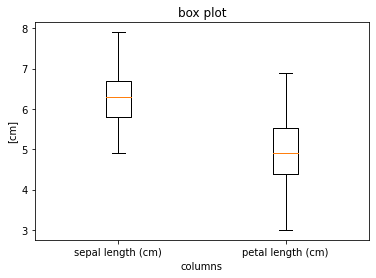

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # 大きさ変更
ax.boxplot([df.iloc[:, 0], df.iloc[:, 1]]) # 各ラベルの内容を箱髭図で表示
ax.set_xticks([1, 2])
ax.set_xticklabels(df.columns.values[0:2])
ax.set_xlabel('columns')
ax.set_ylabel('[cm]')
ax.set_title('box plot');

In [7]:
#df.iloc[:,0:2].plot.box();　後で調べる

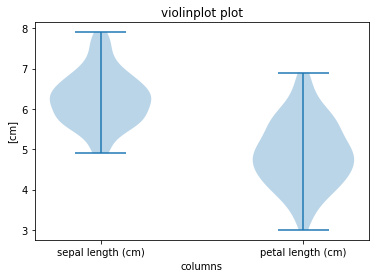

In [8]:
fig, ax = plt.subplots() # 大きさ変更
ax.violinplot([df.iloc[:, 0], df.iloc[:, 1]]) # 各ラベルの内容を箱髭図で表示
ax.set_xticks([1, 2])
ax.set_xticklabels(df.columns.values[0:2])
ax.set_xlabel('columns')
ax.set_ylabel('[cm]')
ax.set_title('violinplot plot');

## 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

《分割する理由》

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [9]:
import numpy as np
X = np.array(df.iloc[:, 0:2])
y = np.array(df.iloc[:, 2])

In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=0)

## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。また、今回は分類問題なので、ラベルについては標準化させる必要はありません。

《実際の問題での前処理は？》

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、さまざまな加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train.iloc[:,0:2]) # 母集団からランダムサンプリングのため片方でおk
print(scaler.mean_)
print(scaler.var_)

[6.27466667 4.9       ]
[0.44029156 0.68373333]


In [12]:
f_train = scaler.fit_transform(df_train.iloc[:, 0:2])
f_test = scaler.fit_transform(df_test.iloc[:, 0:2])

## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [13]:
df_train.head()

,sepal length (cm),petal length (cm),Species
98,5.1,3.0,1
56,6.3,4.7,1
149,5.9,5.1,2
132,6.4,5.6,2
126,6.2,4.8,2


In [14]:
from sklearn.neighbors import KNeighborsClassifier
y_train = df_train.iloc[:, 2]
neigh5 = KNeighborsClassifier()
neigh5.fit(f_train, y_train) # 機械に学ばせている
KNN5 = neigh5.predict(f_test) # 検証データを渡して、結果を得る

In [15]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(f_train, y_train) # 機械に学ばせている
KNN1 = neigh1.predict(f_test) # 検証データを渡して、結果を得る

In [16]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(f_train, y_train) # 機械に学ばせている
KNN3 = neigh3.predict(f_test) # 検証データを渡して、結果を得る

## 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

### 4種類の指標値の意味について簡単に調査して文章でまとめる

| 真実 / 予測値 | Positive           | Negative           | 
| ------------- | ------------------ | ------------------ | 
| Positive      | True Positive -TP  | False Negative -FN | 
| Negative      | False Positive -FP | True Negative -TN  | 

- 適合率(Precision)
Positiveと予測したデータの内本当にPositiveだった確率
$$ Precision = \frac{TP}{TP + FP} $$

- 再現率(Recall)
Positiveのデータ総数のうちPositiveとよく出来た確率
$$ Recall = \frac{TP}{TP + FN} $$

基本的には上記2パラメータを使用  
そのほかにも
- F値
PrecisionとRecallのバランスの良さを測るためにPrecisionとRecallの調和平均を取ったもの
$$ F = \frac{2 * Precision * Recall}{Precision + Recall} $$

- 正解率(Accuracy)
機械学習モデルによる予測における正解数をデータ数で割った値が正解率  
正解ラベルの数によって値が変動するため、使用には注意が必要

$$ Accuracy = \frac{TP + TN}{TP+TN+FP+TN}$$

In [49]:
import sklearn.metrics as me
y_test = df_test.iloc[:, 2]
knn_confusion = me.confusion_matrix(y_test, KNN5) 
print(confusion) # 混同行列

[[11  2]
 [ 0 12]]


In [18]:
knn_accuracy = me.accuracy_score(y_test, KNN5)
knn_precision = me.precision_score(y_test, KNN5)
knn_ecall = me.recall_score(y_test, KNN5)
knn_f1 = me.f1_score(y_test, KNN5)

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='Sepal length', ylabel='Petal length', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    a = np.min(X[:,0])-0.5 # Sepallabelの最小値-0.5
    b = np.max(X[:,0])+0.5 # Sepallabelの最大値+0.5
    c = np.min(X[:,1])-0.5 # Petallabelの最小値-0.5
    d = np.max(X[:,1])+0.5 # Petallabelの最小値+0.5
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(a, b, step), np.arange(c, d, step))
    
    e = np.ravel(mesh_f0) #列が全部指定したもの
    f = np.ravel(mesh_f1) #行が全部指定したもの
    
    mesh = np.c_[e,f] # グラフ領域(2次元)に左上から00.01-といった形で数字をつけた
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color)) # 等高線の間の色付
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)# 等高線の描画
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o') # 散布図の作成
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)] # よくわからんけど凡例の書き方を入れてる
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [20]:
# # meshの使い方
# x = np.arange(0, 5)
# x1_mesh, x2_mesh = np.meshgrid(x,x)
# print(x1_mesh.ravel()) #列が0.1.2.3.4
# print(x2_mesh.ravel()) #行は0.1.2.3.4
# print(np.ravel([x1_mesh, x2_mesh])) #一次元にする関数
# print(np.c_[x1_mesh.ravel(), x2_mesh.ravel()])

In [21]:
# # _rの使い方
# test1 = np.zeros((2, 3))
# test2 = np.ones((2 ,4))
# print(np.hstack([test1, test2]))
# print(np.c_[test1, test2])
# print(np.r_['1', test1, test2])

In [22]:
# # _rの使い方
# test3 = np.zeros((3, 3))
# test4 = np.ones((4 ,3))
# print(np.vstack([test3, test4]))
# print(np.r_[test3, test4])

In [23]:
# # controuの使い方
# x = np.arange(-5, 6)
# x1_mesh, x2_mesh = np.meshgrid(x,x)
# cont = plt.contour(x1_mesh, x2_mesh, np.sqrt(x1_mesh**2 + x2_mesh**2))
# plt.clabel(cont);

In [24]:
# # contourfの使い方
# plt.contourf(x1_mesh, x2_mesh, np.sqrt(x1_mesh**2 + x2_mesh**2));

In [25]:
#df_train.iloc[:, 2]

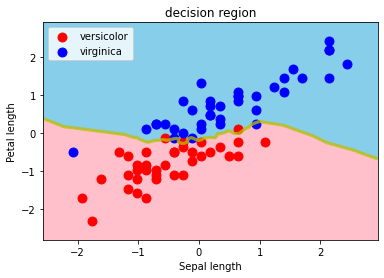

In [26]:
decision_region(f_train, y_train, neigh5) # 訓練データの決定領域

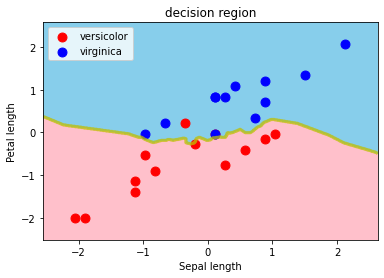

In [27]:
decision_region(f_test, y_test, neigh5) # 検証データの決定領域

## 【問題8】他の手法の学習
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

### ロジスティック回帰

In [28]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(f_train, y_train)
print(logi.classes_) # 分類先のクラス
print(logi.coef_) # 重み
print(logi.intercept_) # 切片
print(logi.n_iter_) # 反復回数

[1 2]
[[-0.38631843  3.337484  ]]
[0.23157329]
[10]


In [29]:
logi_result = logi.predict(f_test)

In [30]:
logi_accuracy = me.accuracy_score(y_test, logi_result)
logi_precision = me.precision_score(y_test, logi_result)
logi_ecall = me.recall_score(y_test, logi_result)
logi_f1 = me.f1_score(y_test, logi_result)
logi_confusion = me.confusion_matrix(y_test, logi_result) 

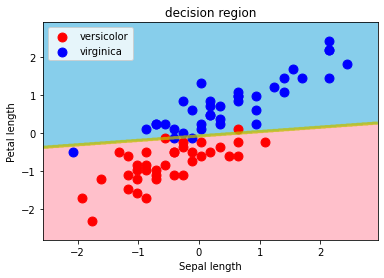

In [31]:
decision_region(f_train, y_train, logi) 

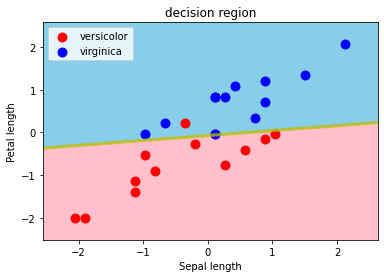

In [32]:
decision_region(f_test, y_test, logi) 

おそらく結果を見る限り、Positiveはversicolorとなる。
Precisionは１なので今回Positiveと分析したデータは全て正解
しかしながらNegativeに２つPositiveと分類した様な結果となった。

### SVM

In [33]:
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(f_train, y_train)

SVC()

In [34]:
svc_result = svc.predict(f_test)

In [35]:
svc_accuracy = me.accuracy_score(y_test, svc_result)
svc_precision = me.precision_score(y_test, svc_result)
svc_ecall = me.recall_score(y_test, svc_result)
svc_f1 = me.f1_score(y_test, svc_result)
svc_confusion = me.confusion_matrix(y_test, svc_result) 

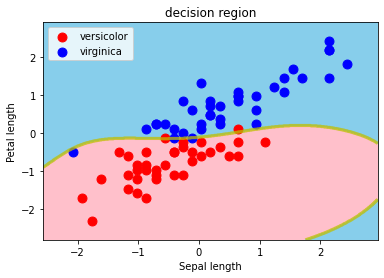

In [36]:
decision_region(f_train, y_train, svc) 

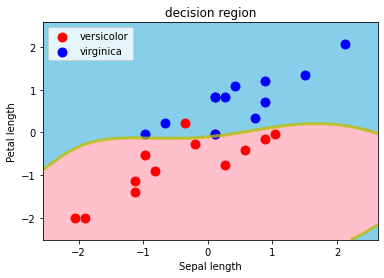

In [37]:
decision_region(f_test, y_test, svc) 

In [38]:
svc_3 = SVC(C=3, gamma='scale')
svc_3.fit(f_train, y_train)

SVC(C=3)

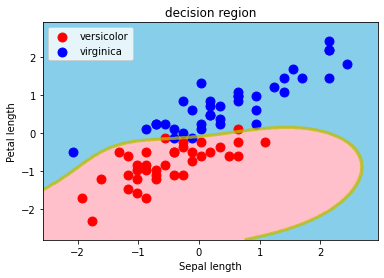

In [39]:
decision_region(f_train, y_train, svc_3) 

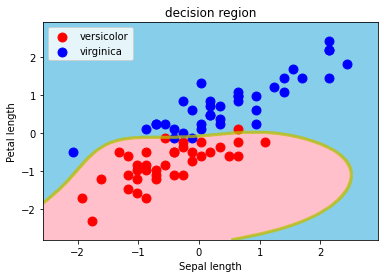

In [40]:
svc_10 = SVC(C=10, gamma='scale')
svc_10.fit(f_train, y_train)
decision_region(f_train, y_train, svc_10) 

Cの値を大きくすることによってペナルティを大きくしている。
過学習が進んでしまうが、データ数がおおいわけではないのでそこまで変化は見られなかった。

### 決定木

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(f_train, y_train)
dtc_result = dtc.predict(f_test)

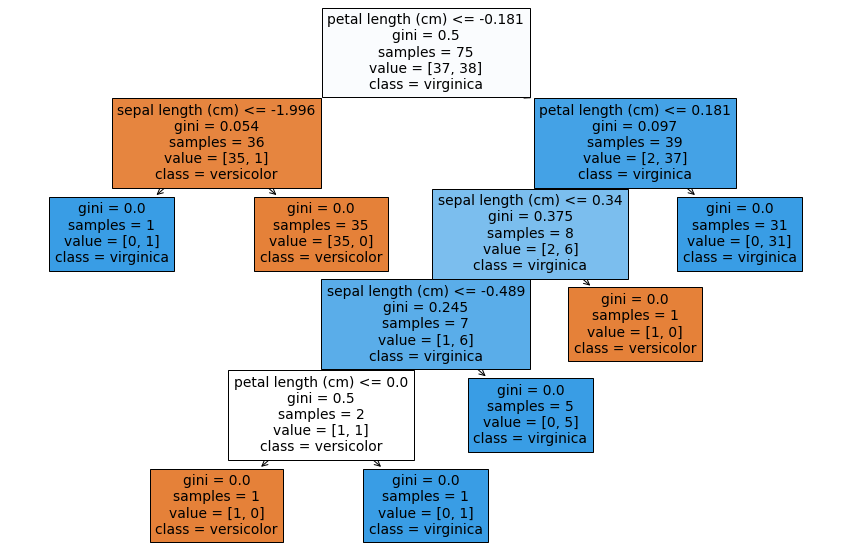

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=df.columns.values[0:2], class_names=['versicolor', 'virginica'], filled=True);

In [43]:
dtc_accuracy = me.accuracy_score(y_test, dtc_result)
dtc_precision = me.precision_score(y_test, dtc_result)
dtc_ecall = me.recall_score(y_test, dtc_result)
dtc_f1 = me.f1_score(y_test, dtc_result)
dtc_confusion = me.confusion_matrix(y_test, dtc_result) 

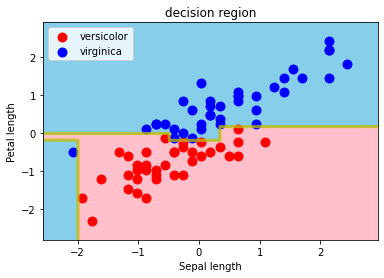

In [44]:
decision_region(f_train, y_train, dtc) 

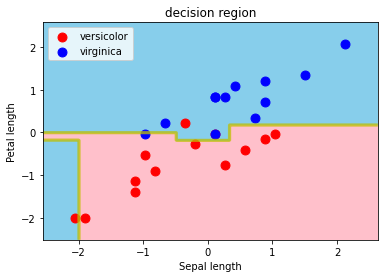

In [45]:
decision_region(f_test, y_test, dtc) 

決定木を使用することで学習段階では100パーセントの分類を深さ5で行うことができた。  
メリットとしてはホワイトボックスなので可視化ができる事と処理が簡単な事が挙げられる。  
giniとはジニ不純度のことであり、その分配によってどれくらい分類ができたかを示す値  

### ランダムフォレスト

決定木分類を行う。その中で訓練データをランダムサンプリングし、そのデータを用いて指定した深さの決定木を作成する。  
各決定木を用いてテストデータの分類を多数決によって決めるやり方をバギングという。  
決定木を改良していく事をブーステイングと呼ぶ。  
外れ値があってもそのデータを使用しない決定木があるため、外れ値に強い

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(f_train, y_train)
clf_result = clf.predict(f_test)

In [47]:
clf_accuracy = me.accuracy_score(y_test, clf_result)
clf_precision = me.precision_score(y_test, clf_result)
clf_ecall = me.recall_score(y_test, clf_result)
clf_f1 = me.f1_score(y_test, clf_result)
clf_confusion = me.confusion_matrix(y_test, clf_result) 

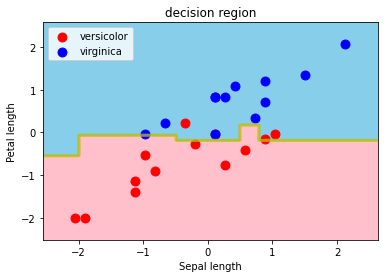

In [48]:
decision_region(f_test, y_test, clf)

結果

In [54]:
print('knn\n', knn_confusion)
print('logi\n', logi_confusion)
print('svc\n', svc_confusion)
print('dtc\n', dtc_confusion)
print('clf\n', clf_confusion)

knn
 [[11  2]
 [ 0 12]]
logi
 [[11  2]
 [ 0 12]]
svc
 [[11  2]
 [ 0 12]]
dtc
 [[10  3]
 [ 1 11]]
clf
 [[ 9  4]
 [ 0 12]]


上記結果より、今回のデータの分類方法であればknn,logi,svmでいい結果が得られた。
なぜこの結果となったのか、チューニングの方法等は今後調べていく。